In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
data=pd.read_csv('adult.csv')

In [35]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [36]:
data=data[(data!='?').all(axis=1)]

C:\Users\hriti\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education.num     30162 non-null int64
marital.status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
native.country    30162 non-null object
income            30162 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [38]:
data['income']=data['income'].map({'<=50K':0,'>50K':1})

In [42]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


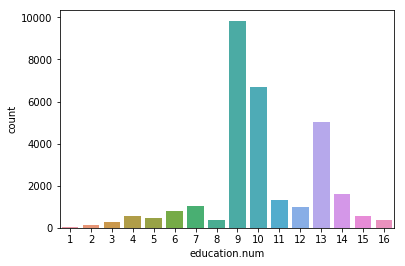

In [43]:
sns.countplot(x='education.num',data=data)

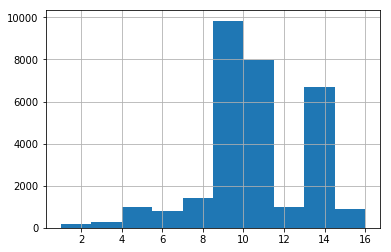

In [47]:
data['education.num'].hist()

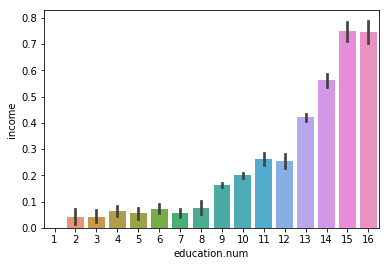

In [50]:
sns.barplot(x='education.num',y='income',data=data)

In [51]:
data=data.drop(['native.country'],axis=1)

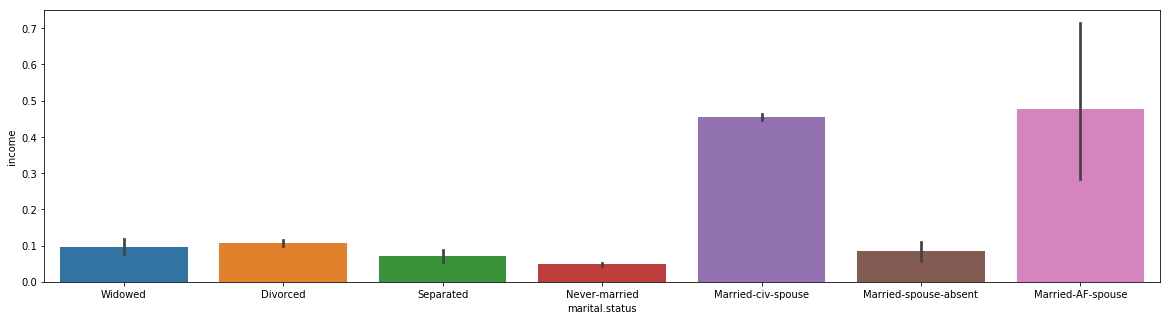

In [58]:
plt.figure(figsize=(20,5))
sns.barplot(x='marital.status',y='income',data=data)

In [61]:
data['marital.status']=data['marital.status'].map({'Married-civ-spouse':'Married', 'Divorced':'Single', 'Never-married':'Single', 'Separated':'Single', 
'Widowed':'Single', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'})

In [62]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,Private,132870,HS-grad,9,Single,Exec-managerial,Not-in-family,White,Female,0,4356,18,0
3,54,Private,140359,7th-8th,4,Single,Machine-op-inspct,Unmarried,White,Female,0,3900,40,0
4,41,Private,264663,Some-college,10,Single,Prof-specialty,Own-child,White,Female,0,3900,40,0
5,34,Private,216864,HS-grad,9,Single,Other-service,Unmarried,White,Female,0,3770,45,0
6,38,Private,150601,10th,6,Single,Adm-clerical,Unmarried,White,Male,0,3770,40,0


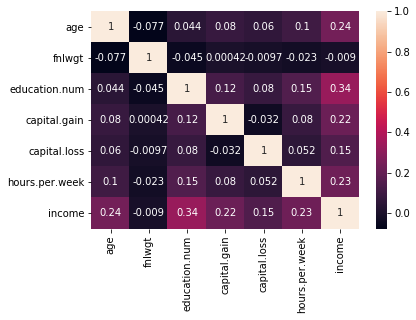

In [63]:
sns.heatmap(data.corr(),annot=True)

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
le=LabelEncoder()

In [68]:
for col in data:
    if data.dtypes[col]==np.object:
        data[col]=le.fit_transform(data[col])

In [69]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,2,132870,11,9,1,3,1,4,0,0,4356,18,0
3,54,2,140359,5,4,1,6,4,4,0,0,3900,40,0
4,41,2,264663,15,10,1,9,3,4,0,0,3900,40,0
5,34,2,216864,11,9,1,7,4,4,0,0,3770,45,0
6,38,2,150601,0,6,1,0,4,4,1,0,3770,40,0


In [70]:
data=data.drop('education',axis=1)

In [71]:
data.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,2,132870,9,1,3,1,4,0,0,4356,18,0
3,54,2,140359,4,1,6,4,4,0,0,3900,40,0
4,41,2,264663,10,1,9,3,4,0,0,3900,40,0
5,34,2,216864,9,1,7,4,4,0,0,3770,45,0
6,38,2,150601,6,1,0,4,4,1,0,3770,40,0


In [72]:
data=data.drop('relationship',axis=1)

In [73]:
data.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,2,132870,9,1,3,4,0,0,4356,18,0
3,54,2,140359,4,1,6,4,0,0,3900,40,0
4,41,2,264663,10,1,9,4,0,0,3900,40,0
5,34,2,216864,9,1,7,4,0,0,3770,45,0
6,38,2,150601,6,1,0,4,1,0,3770,40,0


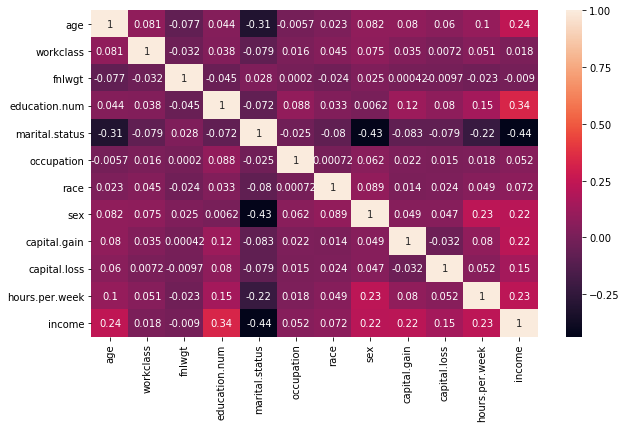

In [75]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [77]:
data=data.drop(['occupation','fnlwgt'],axis=1)

In [78]:
data.head()

,age,workclass,education.num,marital.status,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,2,9,1,4,0,0,4356,18,0
3,54,2,4,1,4,0,0,3900,40,0
4,41,2,10,1,4,0,0,3900,40,0
5,34,2,9,1,4,0,0,3770,45,0
6,38,2,6,1,4,1,0,3770,40,0


In [79]:
X=data.drop('income',axis=1)
y=data['income']

In [80]:
X.head()

,age,workclass,education.num,marital.status,race,sex,capital.gain,capital.loss,hours.per.week
1,82,2,9,1,4,0,0,4356,18
3,54,2,4,1,4,0,0,3900,40
4,41,2,10,1,4,0,0,3900,40
5,34,2,9,1,4,0,0,3770,45
6,38,2,6,1,4,1,0,3770,40


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf=RandomForestClassifier()

In [85]:
rf.fit(X_train,y_train)

C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
pred=rf.predict(X_test)

In [87]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6754
           1       0.71      0.59      0.64      2295

   micro avg       0.83      0.83      0.83      9049
   macro avg       0.79      0.75      0.77      9049
weighted avg       0.83      0.83      0.83      9049



In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf=RandomForestClassifier(n_estimators=100)

In [92]:
score=cross_val_score(rf,X_train,y_train,cv=5)

In [93]:
score.mean()

0.8371622971494557

In [95]:
from sklearn.svm import SVC

In [96]:
model=SVC(C=1.0,gamma=0.1)

In [98]:
score=cross_val_score(model,X_train,y_train,cv=5)

In [99]:
score.mean()

0.8279735961276773

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
lmodel=LogisticRegression()

In [102]:
score=cross_val_score(lmodel,X_train,y_train,cv=5)

C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [103]:
score.mean()*100

83.78722999953

In [115]:
param_grid={'n_estimator':[20,50,100,200,150]}

In [116]:
from sklearn.model_selection import GridSearchCV

In [122]:
c=RandomForestClassifier()
grid=GridSearchCV(estimator=c,param_grid=param_grid,cv=3)

In [123]:
grid.fit(X_train,y_train)

ValueError: Invalid parameter n_estimator for estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [111]:
clf=RandomForestClassifier()

max_features=np.array([1,2,3,4,5])
n_estimators=np.array([25,50,100,150,200])
min_samples_leaf=np.array([25,50,75,100])
param_grid=dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf)
grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=3)
gres=grid.fit(X_train,y_train)

In [112]:
gres.best_score_

0.8517501065694122

In [113]:
gres.best_params_

{'max_features': 5, 'min_samples_leaf': 25, 'n_estimators': 100}

In [124]:
pred=gres.predict(X_test)

In [125]:
from sklearn.metrics import classification_report

In [127]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6754
           1       0.77      0.60      0.67      2295

   micro avg       0.85      0.85      0.85      9049
   macro avg       0.82      0.77      0.79      9049
weighted avg       0.85      0.85      0.85      9049

